## Data Visualization

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

### Load Dataset

In [2]:
# load pre-processed dataset
df = pd.read_csv('Dataset/pre_processed_dataset.csv')

In [18]:
df.columns

Index(['SDST', 'SDET', 'SERVICE_NAME', 'TKIS_TIME', 'encoded_service_name',
       'waiting_time', 'arrival_time', 'arrival_day', 'arrival_month',
       'arrival_year'],
      dtype='object')

In [19]:
df.shape

(280046, 10)

### Distribution of waiting time

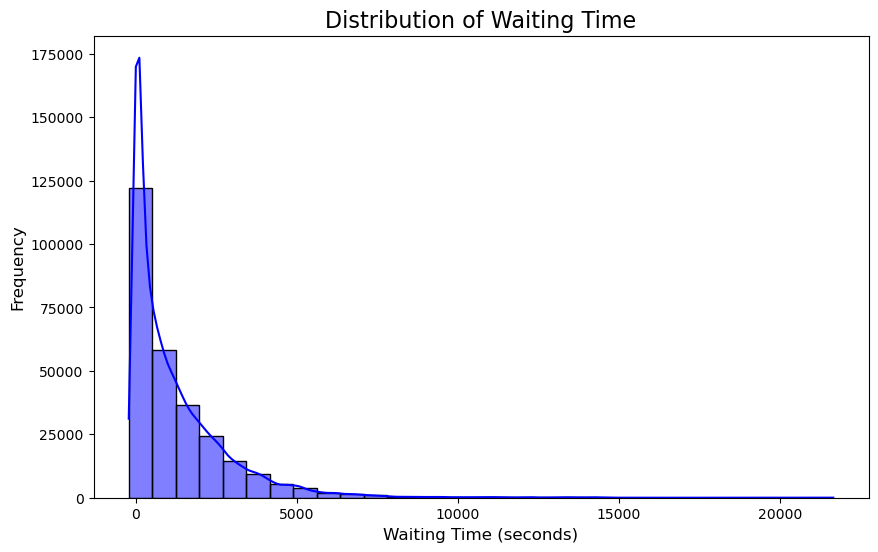

In [20]:
# Visualization 1: Distribution of Waiting Time
plt.figure(figsize=(10, 6))
sns.histplot(df['waiting_time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Waiting Time', fontsize=16)
plt.xlabel('Waiting Time (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

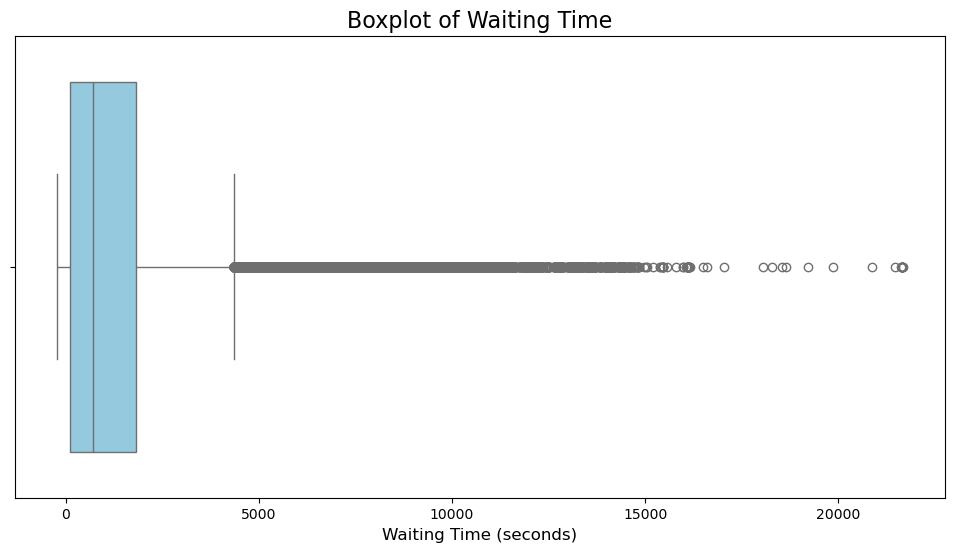

In [21]:
# Plot a boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['waiting_time'], color='skyblue')
plt.title('Boxplot of Waiting Time', fontsize=16)
plt.xlabel('Waiting Time (seconds)', fontsize=12)
plt.show()

### Waiting Time vs Service Name

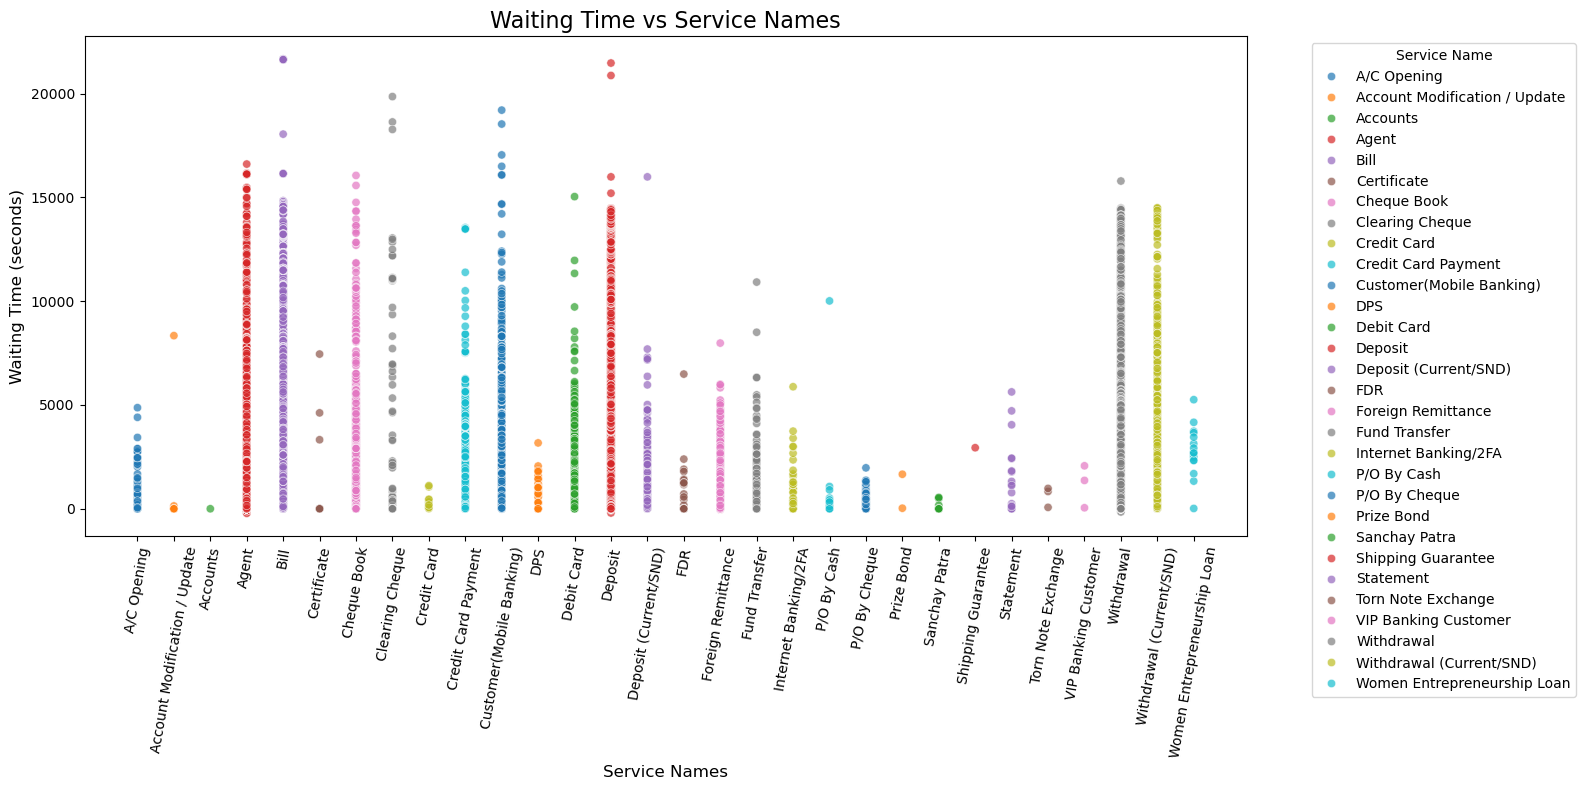

In [22]:
# Sort data by encoded service name to align labels
df = df.sort_values(by='encoded_service_name')

# Create the plot
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df,
    x='SERVICE_NAME',
    y='waiting_time',
    hue='SERVICE_NAME',
    palette='tab10',
    alpha=0.7
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80, fontsize=10)
plt.xlabel('Service Names', fontsize=12)
plt.ylabel('Waiting Time (seconds)', fontsize=12)

# Add title and legend
plt.title('Waiting Time vs Service Names', fontsize=16)
plt.legend(title='Service Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adjust layout to fit legend outside the plot
plt.tight_layout()

# Show the plot
plt.show()

### Average Waiting Time vs Service Name

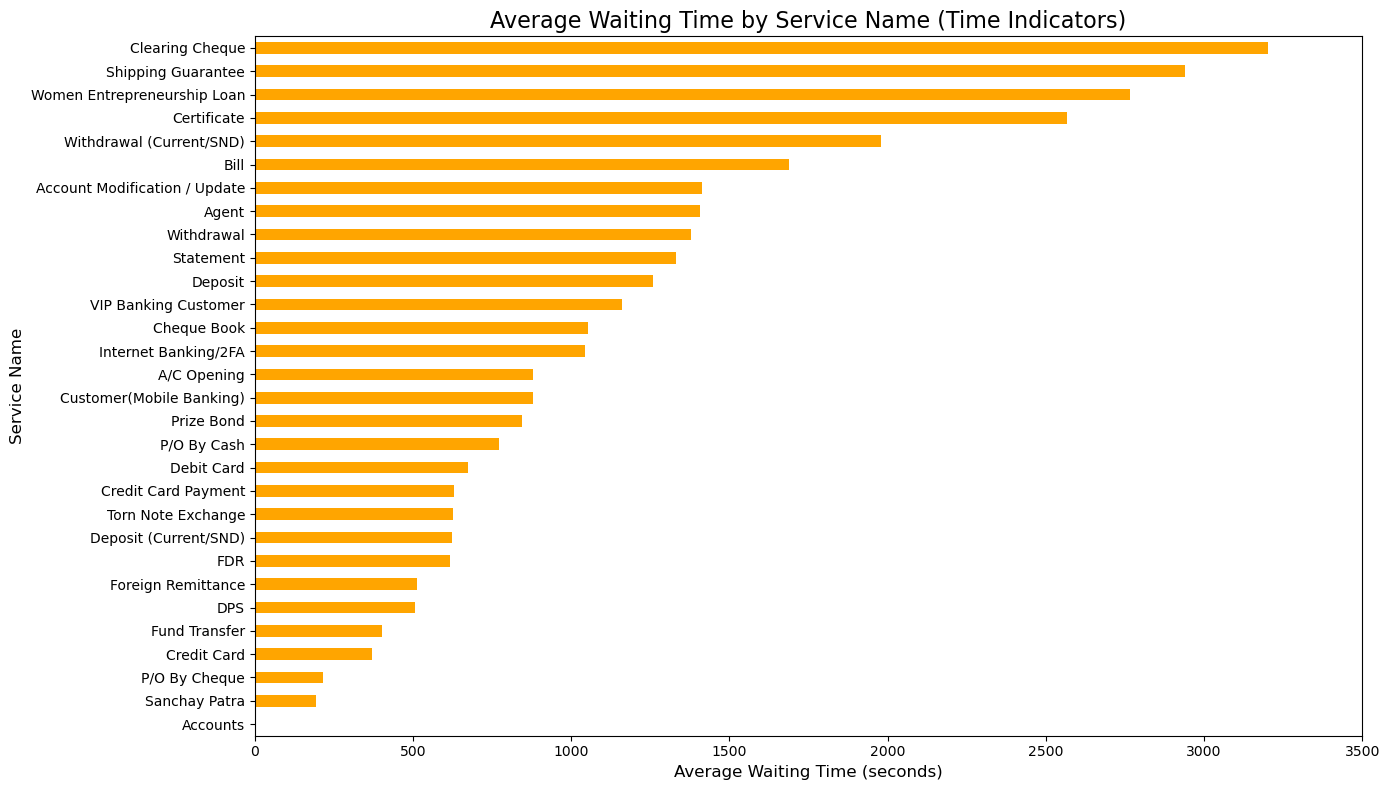

In [23]:
# Calculate average waiting time for each service name, including services with zero waiting time
average_waiting_time = df.groupby('SERVICE_NAME')['waiting_time'].mean().sort_values()

# Define x-axis ticks with 100-second gaps
max_waiting_time = int(average_waiting_time.max())  # Get the maximum waiting time
x_ticks = np.arange(0, max_waiting_time + 500, 500)  # Generate ticks from 0 to max, with a step of 500

# Plot the average waiting time by service name
plt.figure(figsize=(14, 8))
average_waiting_time.plot(kind='barh', color='orange')
plt.title('Average Waiting Time by Service Name (Time Indicators)', fontsize=16)
plt.xlabel('Average Waiting Time (seconds)', fontsize=12)
plt.ylabel('Service Name', fontsize=12)

# Set x-axis ticks for every 100 seconds
plt.xticks(x_ticks, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Normalization

In [24]:
def ploting(name,x1,x2,x3,x4):
    # Plot before and after log transformation
    plt.figure(figsize=(14, 6))

    # Plot 1: Waiting Time Before Log Transformation
    plt.subplot(2, 2, 1)
    sns.histplot(x1, bins=30, kde=True, color='blue')
    plt.title(f'{name} (Before Log Transformation)', fontsize=16)
    plt.xlabel(f'{name}  (seconds)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot 2: Waiting Time After Log Transformation
    plt.subplot(2, 2, 2)
    sns.histplot(x2, bins=30, kde=True, color='green')
    plt.title(f'{name}  (After Log Transformation)', fontsize=16)
    plt.xlabel(f'Log({name} + 1)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot 3: Waiting Time After Robust Transformation
    plt.subplot(2, 2, 3)
    sns.histplot(x3, bins=30, kde=True, color='red')
    plt.title(f'{name}  (After Robust Transformation)', fontsize=16)
    plt.xlabel(f'Robust transformation({name})', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot 3: Waiting Time After zscore Transformation
    plt.subplot(2, 2, 4)
    sns.histplot(x4, bins=30, kde=True, color='yellow')
    plt.title(f'{name}  (After Zscore Transformation)', fontsize=16)
    plt.xlabel(f'{name}_zscore', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Show the plots
    plt.tight_layout()
    plt.show()

c:\Users\sakir\anaconda3\envs\time_prediction_challenge\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


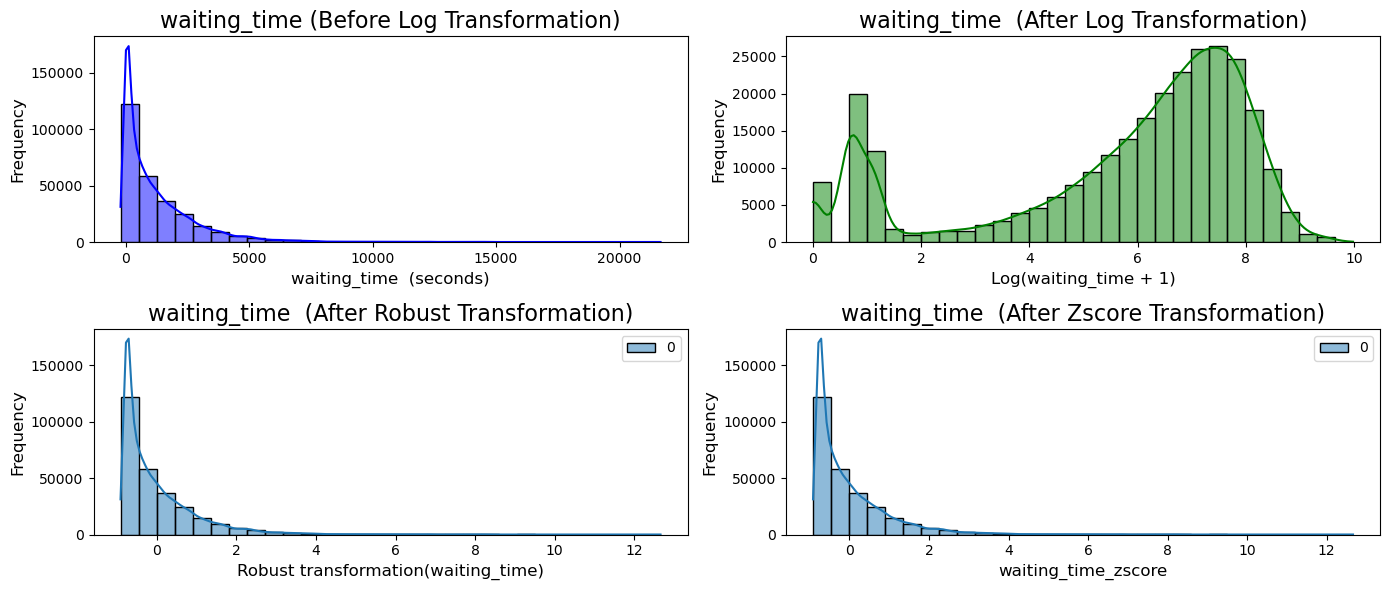

In [25]:
X = df['waiting_time']
# Apply log transformation (add 1 to avoid log(0))

log_ransformation = np.log1p(X)

# Robust Scaling (Good for Outliers)
robust = RobustScaler()
X_robust = robust.fit_transform(df[['waiting_time']])

# Z-score Standardization
zscore = StandardScaler()
X_zscore = zscore.fit_transform(df[['waiting_time']])

ploting('waiting_time',X, log_ransformation, X_zscore, X_zscore)

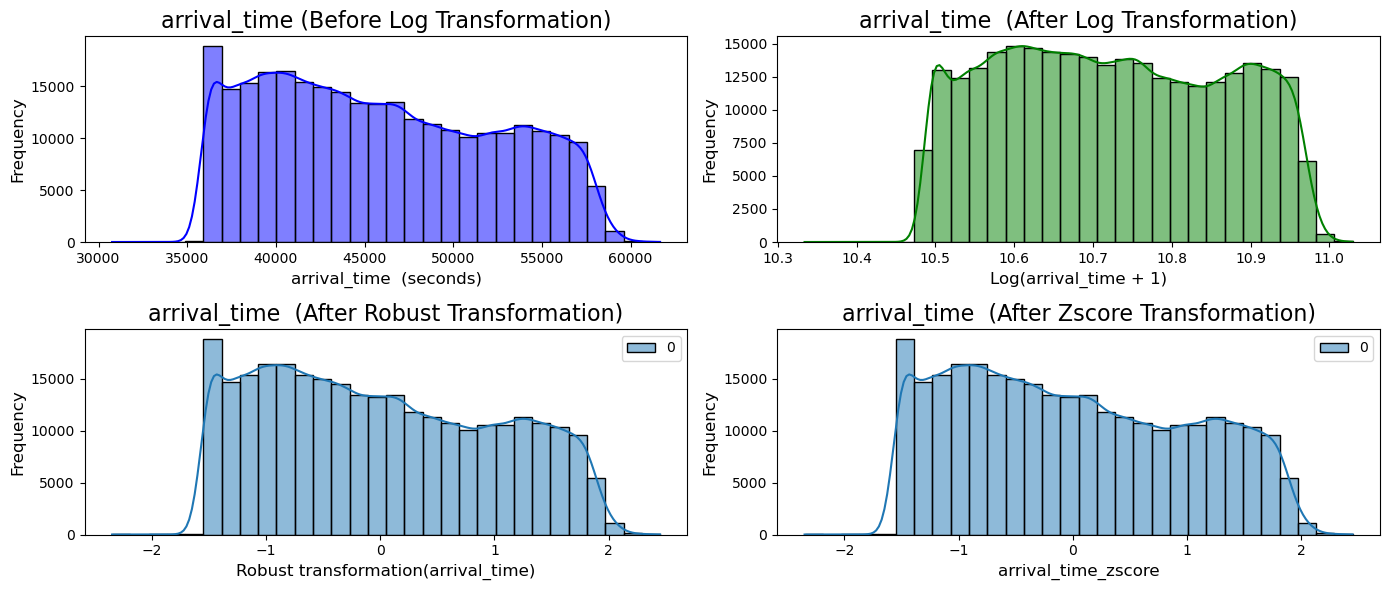

In [26]:
X = df['arrival_time']
# Apply log transformation (add 1 to avoid log(0))

log_ransformation = np.log1p(X)

# Robust Scaling (Good for Outliers)
robust = RobustScaler()
X_robust = robust.fit_transform(df[['arrival_time']])

# Z-score Standardization
zscore = StandardScaler()
X_zscore = zscore.fit_transform(df[['arrival_time']])

ploting('arrival_time',X, log_ransformation, X_zscore, X_zscore)


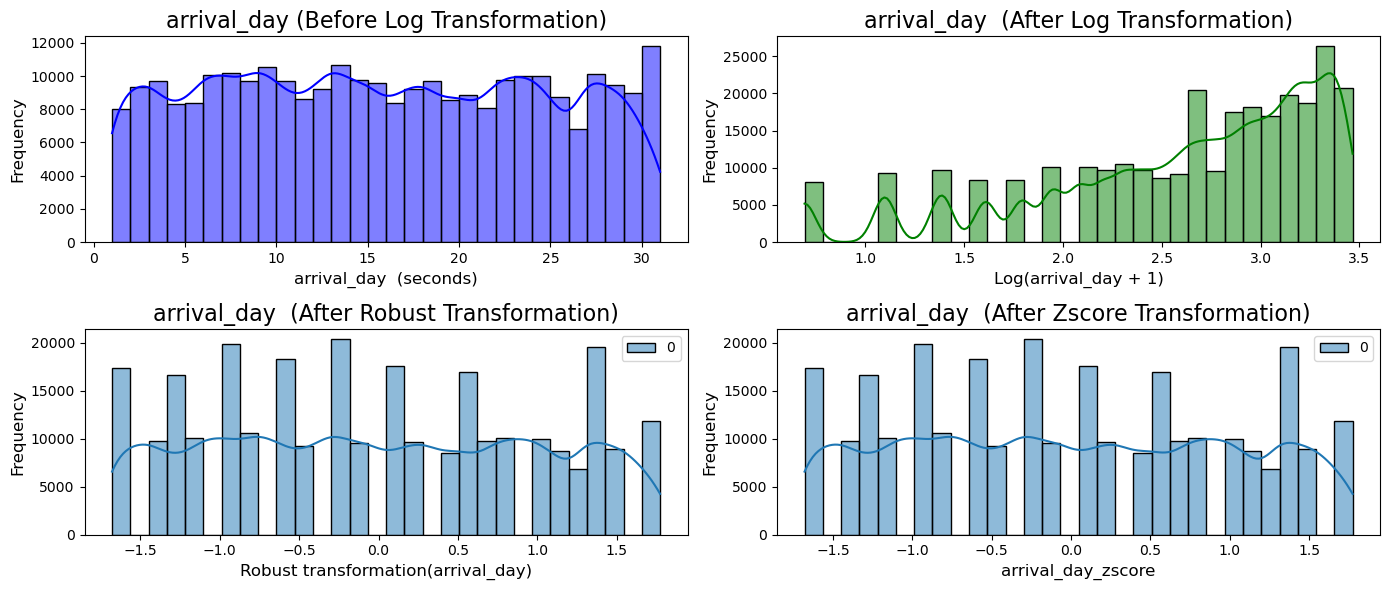

In [27]:
X = df['arrival_day']
# Apply log transformation (add 1 to avoid log(0))

log_ransformation = np.log1p(X)

# Robust Scaling (Good for Outliers)
robust = RobustScaler()
X_robust = robust.fit_transform(df[['arrival_day']])

# Z-score Standardization
zscore = StandardScaler()
X_zscore = zscore.fit_transform(df[['arrival_day']])

ploting('arrival_day',X, log_ransformation, X_zscore, X_zscore)